In [1]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the dataset
movies_data = pd.read_csv('movies.dat' , sep='::', names=['MovieID','Title','Genres'])
ratings_data = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'])
users_data = pd.read_csv('users.dat', sep='::', names=['UserID','Gender','Age','Occupation','Zip-code'])

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  afte

In [3]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


(array([ 222.,    0.,    0., 1103., 2096.,    0., 1193.,    0., 1046.,
         380.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

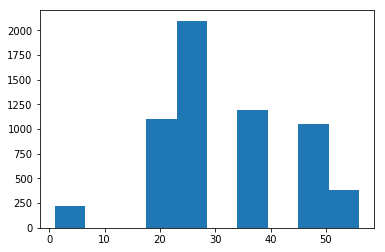

In [6]:
#Visulize Age distribution
plt.hist(users_data.Age)


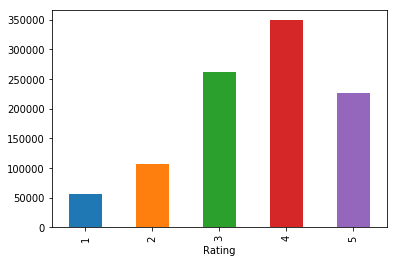

In [8]:
#Groupby rating--plot by user /rating
ratings_data.groupby('Rating',axis=0).UserID.count().plot(kind='bar')

In [9]:
AllData = pd.merge(pd.merge(movies_data,ratings_data, on = 'MovieID'),users_data,on='UserID')

In [10]:
AllData.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [11]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


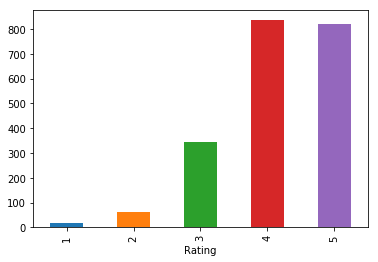

In [14]:
#Find and visualize the user rating of the movie “Toy Story”

AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Rating',axis=0).UserID.count().plot(kind='bar')

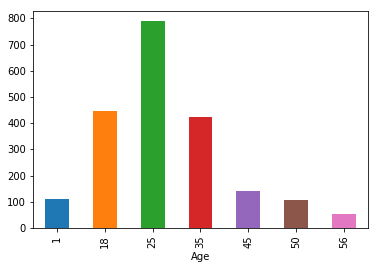

In [18]:
#Find and visualize the viewership of the movie “Toy Story” by age group
AllData[(AllData.Title == 'Toy Story (1995)')].groupby('Age',axis=0).Rating.count().plot(kind='bar')

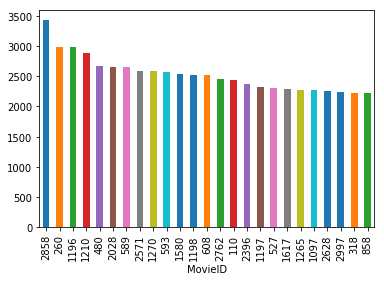

In [21]:
#Find and visualize the top 25 movies by viewership rating
AllData.groupby(['MovieID'],axis=0).Rating.count().sort_values(ascending=False).head(25).plot(kind='bar')

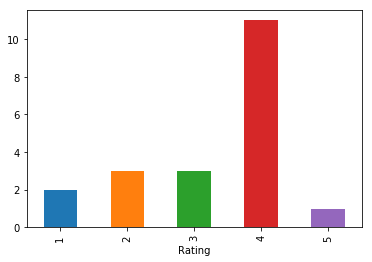

In [24]:
#Find the rating for a particular user of user id = 2696
AllData[AllData.UserID == 2696].groupby('Rating').Rating.count().plot(kind='bar')

In [25]:
#machine learning
#movieid,age,occupation,rating(label)(categorical )
#Create a model to classify the rating based on movieid,age,occupation
#first 500 records from the main dataset (AllData)

dataset = AllData.iloc[:500,[0,7,8,4]]

In [26]:
dataset.head()

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
MovieID       500 non-null int64
Age           500 non-null int64
Occupation    500 non-null int64
Rating        500 non-null int64
dtypes: int64(4)
memory usage: 19.5 KB


In [28]:
#create feature and label set
features = dataset.iloc[:,[0,1,2]].values
label = dataset.iloc[:,-1].values

In [29]:
dataset.Rating.unique()

array([5, 4, 3, 2, 1])

In [30]:
#train test split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,
                                              label,
                                              test_size=0.2,
                                              random_state=0)

In [48]:
#Create Model using KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [49]:
#Accuracy Score
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.5125
0.35


In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([4, 4, 4, 5, 4, 5, 4, 4, 3, 4, 4, 4, 4, 4, 5, 5, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 5, 3, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 3, 4, 5, 4, 3,
       4, 3, 5, 4, 3, 5, 3, 4, 5, 4, 4, 3, 4, 5, 4, 3, 4, 3, 3, 4, 5, 3,
       3, 4, 3, 4, 3, 4, 5, 4, 5, 5, 4, 4])

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <a list of 10 Patch objects>)

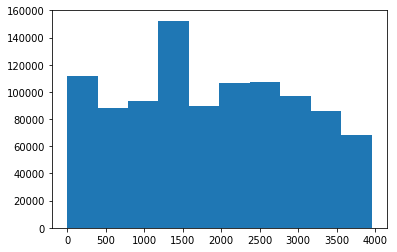

In [52]:
plt.hist(AllData.MovieID)

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

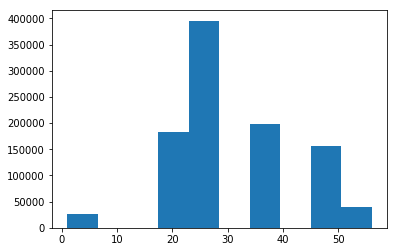

In [53]:
plt.hist(AllData.Age)

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

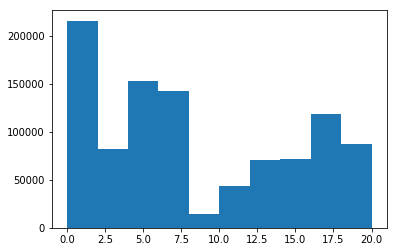

In [54]:
plt.hist(AllData.Occupation)

(array([79., 62., 70., 45., 33., 25., 21., 18., 33., 14.]),
 array([1.0000e+00, 3.9570e+02, 7.9040e+02, 1.1851e+03, 1.5798e+03,
        1.9745e+03, 2.3692e+03, 2.7639e+03, 3.1586e+03, 3.5533e+03,
        3.9480e+03]),
 <a list of 10 Patch objects>)

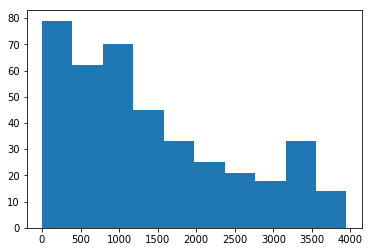

In [55]:
plt.hist(X_train[:,0])

(array([ 45.,   0.,   0.,   0., 189.,   0., 108.,   0.,   0.,  58.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

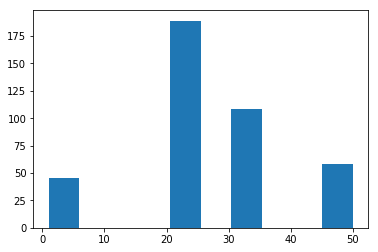

In [56]:
plt.hist(X_train[:,1])

(array([108.,   0.,   0.,   0.,   0., 103., 109.,   0.,   0.,  80.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <a list of 10 Patch objects>)

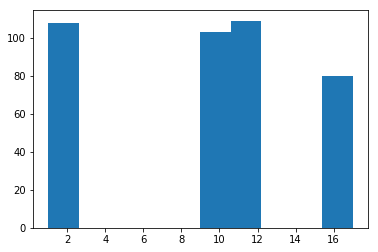

In [57]:
plt.hist(X_train[:,2])

### Done!!!